In [19]:
import warnings
warnings.filterwarnings("ignore")
import torch
import torchvision.transforms as transforms
import numpy as np
import glob
import matplotlib.pyplot as plt
from PIL import Image

In [22]:
import sys
sys.path.append("../pyfiles/")
from util import MinMax, image_from_output
from util_assignment import transform

# Introduction
---
Your assignment includes dataset implementation and model structuring. This notebook contains a form of the former homework, so please submit this notebook for evaluation. It requires [fashion_dataset2](https://drive.google.com/drive/folders/1YmKP_K9b9ZsZNWonA0t9FuDp6OSH16yW?usp=sharing), so please visit and download it.

---

# Fashion_dataset2
---
The major features are almost the same except for the name of folder. Class labels are employed as the name instead of class id (number). The tree structure is:
```
fashion_dataset2
├── T-shirt 
│   ├── 0_0001.png
│   ├── 0_0002.png
│   └── ...
├── Trouser
│   ├── 0_0001.png
│   ├── 0_0002.png
│   └── ...
├── Dress
│   ├── 0_0001.png
│   ├── 0_0002.png
│   └── ...
├── ...
```

---

# Homework 1: Dataset Modification
---
In the first assignment, you are tasked with modifying dataset function to extract data that belong to footwear classes, which include sandals, sneakers, and ankle boots. The cells you need to modify are just two and I underscored the part you should change or add. Please refer to the lesson notebook `01_classification.ipynb` for some clues.

**Hint: "class_labels" is added to arguments.**

---

In [23]:
class Dataset_Fashion_MNIST(torch.utils.data.Dataset):
    def __init__(self, root, classes, class_labels, mode="train", transform=None, balance=[0.7,0.15,0.15], each_data_num=10000000):
        # Hint: "class_labels" is added to arguments.
        
        self.transform = transform
        self.images = []
        self.labels = []

        images = {} 
        labels = {}
        
        for cl in classes:
            
            # -------------- add the code below ------------------- #
            path_list = glob.glob(root + f"{class_labels[cl]}/*") 
            # ----------------------------------------------------- #
            path_list.sort()
            path_list = path_list[:each_data_num]
            
            train_num = int(balance[0]*len(path_list))
            val_num = int(balance[1]*len(path_list))
            test_num = int(balance[2]*len(path_list))
            
            if mode=="train":
                path_list = path_list[:train_num]
            elif mode=="val":
                path_list = path_list[train_num:train_num+val_num]
            elif mode=="test":
                path_list = path_list[-test_num:]
                
            images[str(cl)] = path_list
            labels[str(cl)] = [cl]*len(path_list)
            
        # combine them together
        for label in classes:
            for image, label in zip(images[str(label)], labels[str(label)]):
                self.images.append(image)
                self.labels.append(label)

    def __getitem__(self, index):
        
        image = self.images[index]
        label = self.labels[index]
        
        with open(image, 'rb') as f:
            image = Image.open(f)
            image = image.convert("L")
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label
    
    def __len__(self):
        return len(self.images)

In [ ]:
# -------------- modify the code below ------------------- #
# class_labels = ["T-shirt", "Trouser", "Dress", "Coat", "Sandal", "Sneaker", "Bag", "Ankle_boot"]
class_labels = ["Sandal", "Sneaker", "Ankle_boot"]
# -------------------------------------------------------- #

root = "../fashion_dataset2/"
classes = range(len(class_labels))

---
Run the code below to check your implementation. The output should be:

<img src="./../data/images/answer1.png" width="300">

---

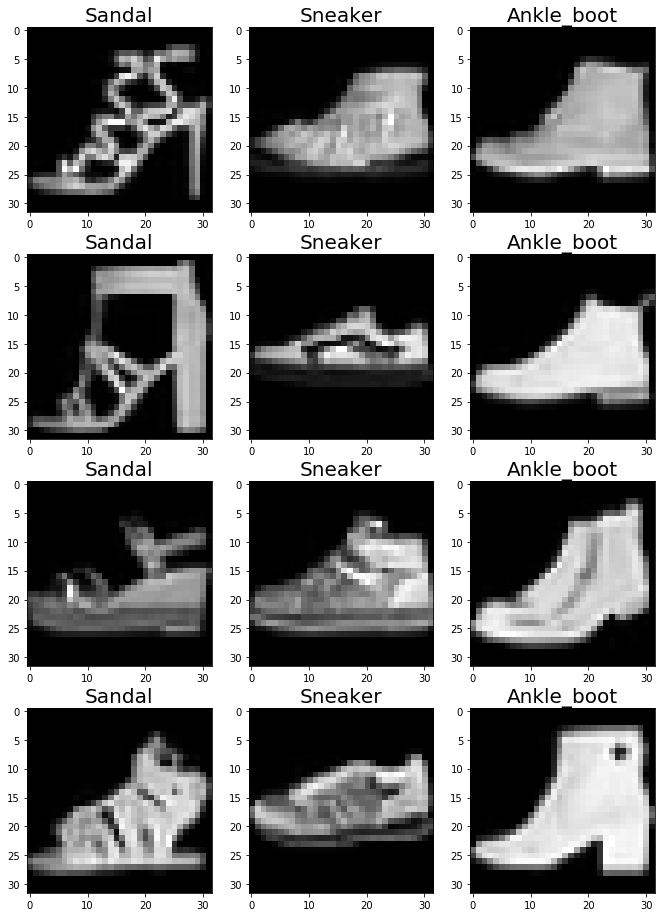

In [28]:
dataset = Dataset_Fashion_MNIST(root, classes, class_labels, "test", transform["test"], each_data_num=2000)
display_num = 4
each_num = int(len(dataset)/len(classes))
fig = plt.figure(figsize=(3.75*len(classes), display_num*4))
for i in range(display_num):
    for cl in classes:
        ax = fig.add_subplot(display_num, len(classes), len(classes)*i+cl+1)
        index = i + cl*each_num
        x, label = dataset[index]
        ax.imshow(image_from_output(x)[0])
        ax.set_title(f"{class_labels[cl]}", fontsize=20)